Converged in 3283 epochs.


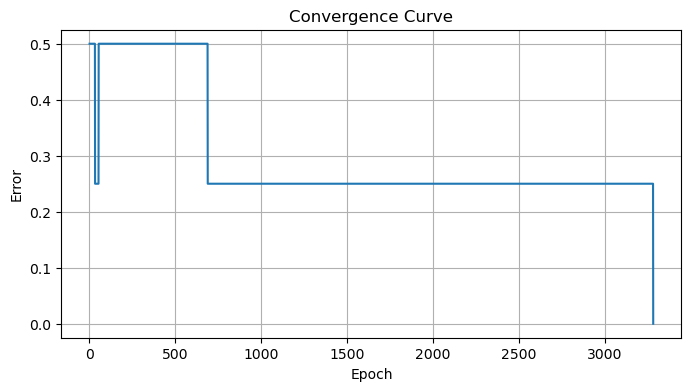

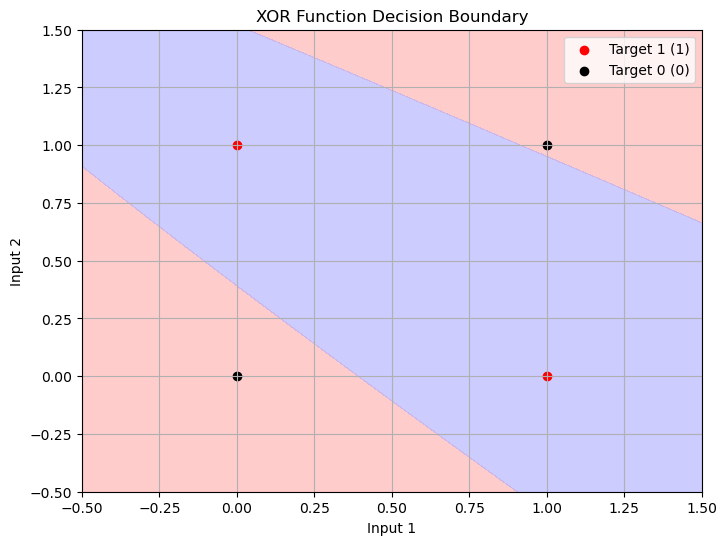

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative (for training)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR function dataset
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

targets = np.array([0, 1, 1, 0])

# Neural network parameters
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
learning_rate = 0.1
max_epochs = 10000

# Initialize weights and biases with random values
np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
bias_hidden = np.random.randn(hidden_layer_size)

weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)
bias_output = np.random.randn(output_layer_size)

convergence_curve = []

# Training the neural network
for epoch in range(max_epochs):
    misclassified = 0
    for i in range(len(inputs)):
        # Forward pass
        hidden_layer_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        # Backpropagation
        error = targets[i] - predicted_output
        if targets[i] != np.round(predicted_output):
            misclassified += 1

        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_delta = output_delta.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output += hidden_layer_output[:, np.newaxis] * output_delta * learning_rate
        bias_output += output_delta * learning_rate

        weights_input_hidden += inputs[i][:, np.newaxis] * hidden_delta * learning_rate
        bias_hidden += hidden_delta * learning_rate
        
    err = 1 - (len(inputs) - misclassified) / len(inputs)
    convergence_curve.append(err)

    if misclassified == 0:
        print("Converged in {} epochs.".format(epoch + 1))
        break

# Plot convergence curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(convergence_curve) + 1), convergence_curve)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Convergence Curve')
plt.grid()
plt.show()

# Create a grid of points to plot decision boundaries
x1 = np.linspace(-0.5, 1.5, 200)
x2 = np.linspace(-0.5, 1.5, 200)
X1, X2 = np.meshgrid(x1, x2)

# Function to predict outputs over the grid
def predict(x1, x2):
    hidden_input = np.dot(np.c_[x1.ravel(), x2.ravel()], weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = sigmoid(output_input)
    return output.reshape(x1.shape)

Z = predict(X1, X2)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'], alpha=0.6)

# Plot data points
plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], label='Target 1 (1)', color='red')
plt.scatter(inputs[targets == 0][:, 0], inputs[targets == 0][:, 1], label='Target 0 (0)', color='black')

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Function Decision Boundary')
plt.legend()
plt.grid()
plt.show()